In [6]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib as plt
baseball_df = pd.read_csv("savant_data (1).csv")
baseball_df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FC,2024-05-18,93.4,-0.29,6.28,"Smith, Will",669257,668933,field_out,hit_into_play,...,3,3,0,Standard,Standard,206.0,-0.009,-0.337,65.369387,7.31887
1,FC,2024-05-18,93.2,-0.50,6.29,"Smith, Will",669257,668933,NaN,called_strike,...,3,3,0,Standard,Standard,208.0,0.000,-0.030,NaN,NaN
2,SI,2024-05-18,92.8,-0.67,5.98,"Smith, Will",669257,668933,NaN,ball,...,3,3,0,Standard,Standard,216.0,0.000,0.074,NaN,NaN
3,FC,2024-05-18,92.6,-0.27,6.31,"Smith, Will",669257,668933,NaN,ball,...,3,3,0,Standard,Standard,202.0,0.000,0.046,NaN,NaN
4,SL,2024-05-18,87.6,-0.56,6.10,"Smith, Will",669257,668933,NaN,ball,...,3,3,0,Standard,Standard,48.0,0.000,0.028,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,FF,2024-05-12,96.4,1.86,5.76,"Wong, Connor",657136,669022,NaN,ball,...,0,0,0,Standard,Strategic,154.0,0.000,0.115,NaN,NaN
24996,SI,2024-05-12,95.0,-1.39,5.93,"Sabol, Blake",666165,593423,field_out,hit_into_play,...,0,0,3,Infield shade,Standard,219.0,-0.015,-0.158,73.268276,6.99910
24997,SI,2024-05-12,89.9,-0.63,6.46,"Bader, Harrison",664056,693821,NaN,called_strike,...,0,0,1,Standard,Standard,203.0,0.000,-0.076,NaN,NaN
24998,SI,2024-05-12,96.9,-1.69,5.34,"Doyle, Brenton",686668,642546,NaN,ball,...,2,2,1,Strategic,Standard,235.0,0.000,0.440,NaN,NaN


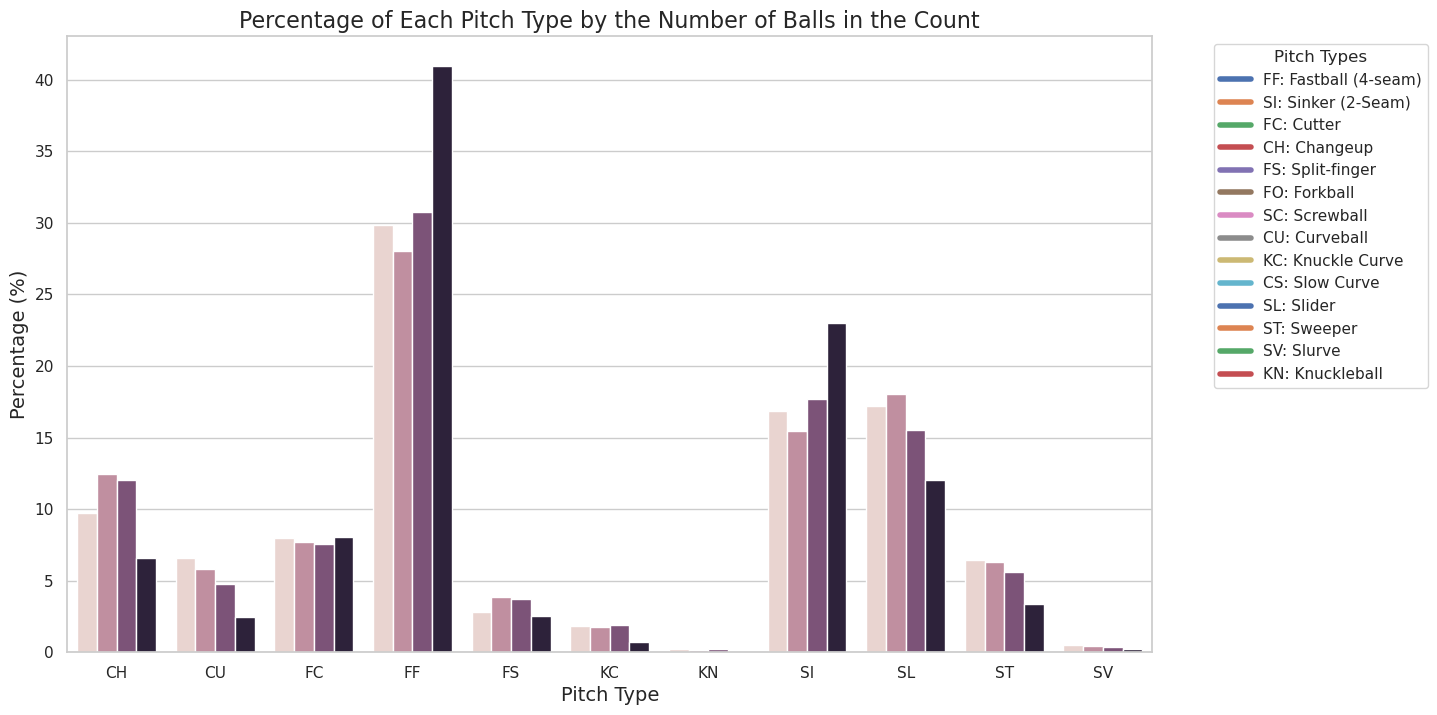

In [22]:
#Graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

baseball_df = pd.read_csv("savant_data (1).csv")

exclude_pitches = ['EP', 'FA', 'IN', 'PO']
filtered_df = baseball_df[~baseball_df['pitch_type'].isin(exclude_pitches)]

grouped = filtered_df.groupby(['balls', 'pitch_type']).size().reset_index(name='count')

total_pitches = filtered_df.groupby(['balls']).size().reset_index(name='total_count')

merged = pd.merge(grouped, total_pitches, on=['balls'])

merged['percentage'] = (merged['count'] / merged['total_count']) * 100

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(data=merged, x='pitch_type', y='percentage', hue='balls', dodge=True, ax=ax)

ax.set_title('Percentage of Each Pitch Type by the Number of Balls in the Count', fontsize=16)
ax.set_xlabel('Pitch Type', fontsize=14)
ax.set_ylabel('Percentage (%)', fontsize=14)

pitch_type_descriptions = {
    'FF': 'Fastball (4-seam)',
    'SI': 'Sinker (2-Seam)',
    'FC': 'Cutter',
    'CH': 'Changeup',
    'FS': 'Split-finger',
    'FO': 'Forkball',
    'SC': 'Screwball',
    'CU': 'Curveball',
    'KC': 'Knuckle Curve',
    'CS': 'Slow Curve',
    'SL': 'Slider',
    'ST': 'Sweeper',
    'SV': 'Slurve',
    'KN': 'Knuckleball'
}

colors = itertools.cycle(sns.color_palette())
custom_lines = [plt.Line2D([0], [0], color=next(colors), lw=4) for _ in pitch_type_descriptions]

legend_labels = [f"{k}: {v}" for k, v in pitch_type_descriptions.items()]

ax.legend(custom_lines, legend_labels, title="Pitch Types", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



In [23]:
# Regression
import pandas as pd
import statsmodels.api as sm

baseball_df = pd.read_csv("savant_data (1).csv")

exclude_pitches = ['EP', 'FA', 'IN', 'PO']
filtered_df = baseball_df[~baseball_df['pitch_type'].isin(exclude_pitches)]

pitch_dummies = pd.get_dummies(filtered_df['pitch_type'], prefix='pitch')

filtered_df = pd.concat([filtered_df, pitch_dummies], axis=1)

X = filtered_df[['balls']]  
X = sm.add_constant(X)      

pitch_types = pitch_dummies.columns

models = {}
for pitch in pitch_types:
    y = filtered_df[pitch]  
    model = sm.Logit(y, X).fit()
    models[pitch] = model
    print(f"\nLogistic Regression Results for {pitch}:")
    print(model.summary())


Optimization terminated successfully.
         Current function value: 0.339286
         Iterations 6

Logistic Regression Results for pitch_CH:
                           Logit Regression Results                           
Dep. Variable:               pitch_CH   No. Observations:                24988
Model:                          Logit   Df Residuals:                    24986
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 May 2024   Pseudo R-squ.:               1.047e-08
Time:                        21:12:21   Log-Likelihood:                -8478.1
converged:                       True   LL-Null:                       -8478.1
Covariance Type:            nonrobust   LLR p-value:                    0.9894
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1265      0.028    -76.926      0.000      -2.18